<h2> Load librairies </h2>

In [1]:
import pandas as pd 
import numpy as np 
from collections import Counter
import time
from Prep_dataset1_1 import Preprocessing

<h2> Manipulation de dataset 1 : </h2>


In [2]:
dataset = pd.read_csv('../Data/Dataset1.csv')
dataset.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1.4792,1


In [3]:
dataset = Preprocessing()
dataset.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Fertility
0,0.350133,0.046683,0.354422,0.640000,0.611765,0.025105,0.173254,0.004054,0.002284,0.232082,0.278407,0.018116,0.0
1,0.549072,0.037674,0.211104,0.655610,0.764706,0.040167,0.197628,0.005485,0.014844,0.494881,0.089997,0.126812,0.0
2,0.416446,0.054873,0.456423,0.652683,0.482353,0.042259,0.201392,0.005485,0.014844,0.505119,0.083846,0.126812,0.0
3,0.400531,0.031941,0.299548,0.657561,0.564706,0.035146,0.197628,0.006439,0.007536,0.491468,0.082227,0.126812,0.0
4,0.700265,0.057330,0.279535,0.656585,0.352941,0.031799,0.367589,0.004293,0.012560,0.546075,0.075105,0.126812,0.5


In [29]:
def load_data():
    df = pd.read_csv('../Data/Dataset1.csv')
    df['P'] = pd.to_numeric(df['P'],errors='coerce') 

    return df

dataset = load_data()

## Description globale du dataset

In [30]:
# Fournir une description globale du dataset.
def Description(dataset):
    print("Description du dataset :")
    print(dataset.describe())
    print("Description de chaque attribut du dataset :")
    print(dataset.info())
    print("Nombre de valeurs manquantes :")
    print(dataset.isnull().sum())
    print("Nombre de valeurs dupliquées :")
    print(dataset.duplicated().sum())
    print("Nombre de valeurs uniques :")
    print(dataset.nunique())
    print("Valeurs uniques de chaque attribut :")
    for col in dataset.columns:
        print(col, dataset[col].unique())
    print("Valeurs manquantes :")
    print(dataset.isna().sum())
   
 

Desccription_table = pd.DataFrame({
    'Description' : [  'Number of rows','Number of columns' ,
     'Nombre de valeurs manquantes', 'Nombre de valeurs dupliquées', 'Nombre de valeurs uniques',
      'Data types'  , 'Valeurs uniques de chaque attribut'],
    'Valeurs' : [ dataset.shape[0],dataset.shape[1] ,
     dataset.isnull().sum().tolist(), dataset.duplicated().sum(),  dataset.nunique().sum(), 
      dataset.dtypes.tolist() , dataset.isna().sum().tolist()]

})
Desccription_table

,Description,Valeurs
0,Number of rows,885
1,Number of columns,14
2,Nombre de valeurs manquantes,"[0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]"
3,Nombre de valeurs dupliquées,3
4,Nombre de valeurs uniques,1865
5,Data types,"[int64, float64, int64, float64, float64, floa..."
6,Valeurs uniques de chaque attribut,"[0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]"


In [31]:
# Fournir une description de chaque attribut du dataset.
Description_measures = {'Measures' :[ 'Number of rows','Number of columns' , 'Data types'  , 'Valeurs uniques de chaque attribut' ,
    'Number of duplicates' , 'Number of missing values' , ]}

for col in dataset.columns[0:]:
    Description_measures[col]=[
    dataset.shape[0], 
    dataset.shape[1],
    dataset.dtypes[col],
    dataset[col].nunique() , 
    dataset[col].duplicated().sum() ,
    dataset[col].isnull().sum(),
    ]
Description_measures = pd.DataFrame(Description_measures)
Description_measures

,Measures,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,Number of rows,885,885,885,885,885,885,885,885,885,885,885,885,885,885
1,Number of columns,14,14,14,14,14,14,14,14,14,14,14,14,14,14
2,Data types,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
3,Valeurs uniques de chaque attribut,61,92,63,107,71,68,153,70,387,166,429,127,68,3
4,Number of duplicates,824,792,822,778,814,816,732,815,498,718,456,758,817,882
5,Number of missing values,0,2,0,0,0,1,0,0,0,1,0,0,0,0


In [32]:
# convert elements of the dataset column 'P' from object to a type float64
dataset['P'] = pd.to_numeric(dataset['P'],errors='coerce')
# print(dataset['P'])
dataset.head(20)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
5,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0
6,220,7.2,222,7.62,0.43,0.81,7.40,0.34,0.69,1.05,2.00,1.88,1.3932,0
7,207,7.0,401,7.63,0.59,0.69,7.60,0.32,0.68,0.62,2.43,1.68,1.1868,0
8,333,14.9,422,8.26,0.48,NaN,8.45,0.51,3.32,1.08,9.21,0.32,2.0124,2
9,289,8.6,560,7.58,0.44,0.67,7.30,0.63,0.66,0.94,2.43,1.79,1.1524,1


In [33]:
 # Calculer les mesures de tendance centrale et de dispersion pour chaque attribut du dataset.
def Calculate_Measure(dataset):
    # Create an empty dictionary to store the measures
    measures = {'Mesure': ['Moyenne', 'Médiane', 'Variance', 'Q0:Min', 'Q1', 'Q2', 'Q3', 'Q4:Max' , 'Ecart-type', 'Skewness', 'Kurtosis'  ]}
    
    # Loop through each column in the dataset
    for col in dataset.columns[:]:
        # Calculate the required measures for each column and append to the dictionary
        measures[col] = [
            dataset[col].mean().round(2), 
            round(dataset[col].median(), 2),
            round(dataset[col].var(), 2), 
            sorted(dataset[col])[0], 
            dataset[col].quantile(0.25),
            dataset[col].quantile(0.5),
            dataset[col].quantile(0.75),
            sorted(dataset[col])[-1],
            round(dataset[col].std(), 2),
            round(dataset[col].skew(), 2),
            dataset[col].kurtosis(),
        ]
    
    # Create a DataFrame from the dictionary
    Mesure_tendance_centrale = pd.DataFrame(measures)
    
    return Mesure_tendance_centrale

# Assuming 'dataset' is your DataFrame
Mesure_tendance_centrale = Calculate_Measure(dataset)
Mesure_tendance_centrale

,Mesure,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,Moyenne,247.000000,14.560000,501.340000,7.510000,0.540000,0.620000,7.5500,0.47000,4.130000,0.950000,8.65000,0.590000,1.060000,0.59000
1,Médiane,257.000000,8.100000,475.000000,7.500000,0.550000,0.590000,6.6400,0.36000,3.560000,0.930000,8.34000,0.410000,1.010000,1.00000
2,Variance,5984.460000,480.970000,16668.000000,0.220000,0.020000,0.710000,19.5200,3.57000,9.660000,0.220000,18.50000,0.330000,2.090000,0.33000
3,Q0:Min,6.000000,2.900000,11.000000,0.900000,0.100000,0.100000,0.6400,0.07000,0.210000,0.090000,0.11000,0.060000,0.172000,0.00000
4,Q1,201.000000,6.800000,412.000000,7.350000,0.430000,0.380000,4.7000,0.28000,2.050000,0.630000,6.21000,0.270000,0.653600,0.00000
5,Q2,257.000000,8.100000,475.000000,7.500000,0.550000,0.590000,6.6400,0.36000,3.560000,0.930000,8.34000,0.410000,1.014800,1.00000
6,Q3,307.000000,10.700000,581.000000,7.630000,0.640000,0.780000,8.7500,0.47000,6.320000,1.250000,11.47000,0.610000,1.341600,1.00000
7,Q4:Max,383.000000,125.000000,1560.000000,11.150000,0.950000,24.000000,31.0000,42.00000,44.000000,NaN,31.00000,2.820000,41.280000,2.00000
8,Ecart-type,77.360000,21.930000,129.100000,0.460000,0.140000,0.840000,4.4200,1.89000,3.110000,0.470000,4.30000,0.570000,1.450000,0.58000
9,Skewness,-0.630000,3.410000,0.980000,-5.100000,0.100000,24.380000,2.4600,20.94000,3.590000,0.430000,0.60000,2.120000,24.370000,0.36000


<h1> 2. Prétraitement des données </h1>

<h3>Traitement des valeurs manquantes et aberrantes </h3>

In [34]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split


def replace_missing_values(dataset , method):
    """Replace missing values """
    if method == 'mean':
        dataset.fillna(dataset.mean(), inplace=True)
    elif method == 'median':
        dataset.fillna(dataset.median(), inplace=True)
    elif method == 'mode':
        dataset.fillna(dataset.mode(), inplace=True)
    return dataset

def predict_missing_values(dataset):
    """Predict missing values using a HistGradientBoostingRegressor for all columns."""
    
    for column in dataset.columns:
        # Skip columns with no missing values
        if dataset[column].isnull().sum() == 0:
            continue
        
        # Separate data into features and target
        features = dataset.dropna(subset=[column])
        target = features[column]
        features = features.drop(columns=[column])
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
        
        # Train a machine learning model
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Predict missing values
        missing_data = dataset[dataset[column].isnull()]
        missing_features = missing_data.drop(columns=[column])
        predictions = model.predict(missing_features)
        
        # Fill in missing values with predicted values
        dataset.loc[dataset[column].isnull(), column] = predictions
    
    return dataset

<h2>Traitement des valeurs aberrantes  </h2>
<h4> Utilisation de techniques robustes </h4>

In [35]:
def detect_outliers(data):
    """Detect outliers using the MAD method"""
    outliers = {}
    for col in data.columns:
        if data[col].dtype != 'object':  # Consider only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
            if not col_outliers.empty:
                outliers[col] = col_outliers.index.tolist()
    return outliers

def Replace_outliers(dataset,  treatment_method='median'): # Function to handle outliers
    """Replace outliers using the MAD method"""
    cleaned_data = dataset.copy() # Create a copy of the dataset
    outliers = detect_outliers(dataset) # Get the outliers using the MAD method
    for col in outliers:
        if treatment_method == 'median':
            median = dataset[col].median()
            cleaned_data.loc[outliers[col], col] = median
        elif treatment_method == 'mean':
            mean = dataset[col].mean()
            cleaned_data.loc[outliers[col], col] = mean
    return cleaned_data # Return cleaned dataset
def Handle_outliers(dataset , treatment_method='mean'):
    while detect_outliers(dataset) != {}:
        dataset = Replace_outliers(dataset,  treatment_method='median')  # Handle outliers
        dataset = Replace_outliers(dataset,  treatment_method='mean')  # Handle outliers
    return dataset

In [36]:
def Preprocessing():
    dataset = load_data() # Load the dataset
    # dataset = replace_missing_values(dataset, 'mean') # Replace missing values with the mean 
    dataset = predict_missing_values(dataset) # Replace missing values with the mean
    dataset = Handle_outliers(dataset) # Handle outliers
    return dataset

dataset = Preprocessing()
dataset.head(20)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.600000,560,7.46,0.62,0.700000,5.90000,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.500000,338,7.62,0.75,1.060000,6.64000,0.30,0.86,1.54,2.89,0.41,1.8232,0
2,163,9.600000,718,7.59,0.51,1.110000,6.75426,0.30,0.86,1.57,2.70,0.41,1.9092,0
3,157,6.800000,475,7.64,0.58,0.940000,6.64000,0.34,0.54,1.53,2.65,0.41,1.6168,0
4,270,9.900000,444,7.63,0.40,0.860000,11.80000,0.25,0.76,1.69,2.43,0.41,1.4792,1
5,220,8.600000,444,7.43,0.65,0.720000,11.70000,0.37,0.66,0.90,2.19,0.41,1.2384,0
6,220,7.200000,222,7.62,0.43,0.810000,7.40000,0.34,0.69,1.05,2.00,0.41,1.3932,0
7,207,7.000000,401,7.63,0.59,0.690000,7.60000,0.32,0.68,0.62,2.43,0.41,1.1868,0
8,333,8.316248,422,7.50,0.48,1.270385,8.45000,0.51,3.32,1.08,9.21,0.32,2.0124,2
9,289,8.600000,560,7.58,0.44,0.670000,7.30000,0.63,0.66,0.94,2.43,0.41,1.1524,1


<h3> Réduction des données </h3>

In [37]:
dataset.drop_duplicates(inplace=True) # Drop duplicate rows inplace (in the same DataFrame)

# Drop duplicate columns (Elimination des redondances verticales)
dataset = dataset.T.drop_duplicates().T # Transpose, drop duplicates, transpose back
# dataset = dataset.loc[:,~dataset.columns.duplicated()] # Alternative method to drop duplicate columns

dataset.shape

(882, 14)

<h2>Séparer le dataset 80% Apprentissage  20% Test</h2>

In [38]:
def custom_train_test_split(dataset, test_size=0.2, random_state=None):
    '''
    Splits a dataset into training and test sets.
    parametres:
    -----------
    
    dataset: The dataset to be split
    test_size: The proportion of the dataset to be included in the test set
    random_state: Random state for reproducibility
    returns:
    -------
    train_set: The training set
    test_set: The test set
    '''
    np.random.seed(random_state)  # Pour la reproductibilité du mélange
    
    # nombre de classes dans le dataset
    num_classes = len(np.unique(dataset[:, -1]))
    train_set = np.empty((0, dataset.shape[1]))
    test_set = np.empty((0, dataset.shape[1]))

    for i in range(0, num_classes):
        indices_classe = np.where(dataset[:, -1] == i)[0]
        np.random.shuffle(indices_classe)
        
        nb_test_samples = int(test_size * len(indices_classe))
        test_indices = indices_classe[:nb_test_samples]
        train_indices = indices_classe[nb_test_samples:]
        
        train_set = np.vstack((train_set, dataset[train_indices, :]))
        test_set = np.vstack((test_set, dataset[test_indices, :]))

    np.random.shuffle(train_set)
    np.random.shuffle(test_set)

    return train_set, test_set

In [39]:
train_set , test_set = custom_train_test_split(dataset.values, test_size=0.2, random_state=0)

print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)

train_set = pd.DataFrame(train_set, columns=dataset.columns)
test_set = pd.DataFrame(test_set, columns=dataset.columns)

train_set.head()

Train set shape: (706, 14)
Test set shape: (176, 14)


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,345.0,9.9,507.0,7.90,0.49,0.78,8.45,0.59,7.54,0.37,14.33,0.34,1.3416,1.0
1,195.0,8.3,475.0,7.60,0.42,0.15,11.30,0.29,3.56,0.55,8.66,0.17,0.2580,0.0
2,345.0,6.8,496.0,7.70,0.57,0.88,9.65,0.29,6.30,1.51,9.32,0.34,1.5136,1.0
3,257.0,8.1,591.0,7.33,0.43,0.78,14.00,0.46,0.35,1.74,2.38,0.41,1.3416,0.0
4,326.0,10.1,803.0,7.40,0.53,0.57,6.00,0.37,0.98,0.37,1.43,0.41,0.9804,1.0


<h2>KNN</h2>

In [40]:
class Knn:
    def __init__(self, k=None, distance_function=None):
        self.k = k
        self.distance_function = distance_function

    @staticmethod
    def euclidean_distance(instance_a, instance_b):
        return np.sqrt(sum((a - b)**2 for a, b in zip(instance_a, instance_b)))

    def _sort(self, target_instance):
        distances = self.dataset.apply(lambda row: self.distance_function(np.array(row[:-1]), np.array(target_instance[:-1])), axis=1)
        sorted_indices = distances.argsort()
        sorted_dataset = self.dataset.iloc[sorted_indices].reset_index(drop=True)
        return sorted_dataset  # Return the sorted DataFrame

    def _get_majority_class(self, k_neighbors):
        classes = k_neighbors.iloc[:, -1]
        counts = Counter(classes)
        most_common = counts.most_common()

        # Handle tie for the majority class
        if len(most_common) == 1 or most_common[0][1] > most_common[1][1]:
            return most_common[0][0]
        else:
            # If there is a tie, choose the class with the smaller label
            return min(most_common[0][0], most_common[1][0])

    def fit(self, x_train):
        # Handle missing values (NA) in the dataset
        self.dataset = x_train.dropna()
        return self

    def predict(self, x_test):
        predictions = []
        for i in range(len(x_test)):
            sorted_dataset = self._sort(x_test.iloc[i])
            k_neighbors = sorted_dataset.iloc[:self.k]
            predicted_class = self._get_majority_class(k_neighbors)
            predictions.append(predicted_class)
        return predictions

In [41]:
knn_start = time.time()
# Create an instance of the Knn class
knn_classifier = Knn(k=5, distance_function=Knn.euclidean_distance)

# Fit the model on the training set
knn_classifier.fit(train_set)

# Predict on the test set
predictions = knn_classifier.predict(test_set)
knn_end = time.time()
Knn_time = knn_end - knn_start

# Display the predictions
print("Predictions:", predictions)

Predictions: [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0]


In [74]:
# Transforming the train and test sets into lists
x_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:, -1]
x_test = test_set.iloc[:, :-1]
y_test = test_set.iloc[:, -1]

x_train.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM
0,345.0,9.9,507.0,7.90,0.49,0.78,8.45,0.59,7.54,0.37,14.33,0.34,1.3416
1,195.0,8.3,475.0,7.60,0.42,0.15,11.30,0.29,3.56,0.55,8.66,0.17,0.2580
2,345.0,6.8,496.0,7.70,0.57,0.88,9.65,0.29,6.30,1.51,9.32,0.34,1.5136
3,257.0,8.1,591.0,7.33,0.43,0.78,14.00,0.46,0.35,1.74,2.38,0.41,1.3416
4,326.0,10.1,803.0,7.40,0.53,0.57,6.00,0.37,0.98,0.37,1.43,0.41,0.9804


<h2>Decision Tree</h2>

In [43]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)

        # Ensure that feature index is within a valid range
        if best_feature < X.shape[1]:
            left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
            right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
            return Node(best_feature, best_thresh, left, right)
        else:
            print("Invalid feature index. Skipping node creation.")
            return Node(value=self._most_common_label(y))

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            # Ensure the feature index is valid
            while feat_idx >= X.shape[1]:
                feat_idx = np.random.choice(X.shape[1], 1)[0]

            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        unique_labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def _most_common_label(self, value):
        if isinstance(value, (int, np.int64, float, np.float64)):
            return value
        counter = Counter(value)
        most_common_value = counter.most_common(1)[0][0]
        return most_common_value

    def _traverse_tree(self, x, node):
        if node is None:
            return None

        # Ensure the feature index is valid
        while node.feature is not None and node.feature >= len(x):
            node.feature = np.random.choice(len(x), 1)[0]

        if node.feature is None or x[node.feature] is None:
            return self._most_common_label(node.value)  # Fix: use node.value instead of y

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)
        
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

In [44]:
decision_tree_start = time.time()
# Create an instance of the Decision_Tree class
decision_tree = DecisionTree(min_samples_split=3, max_depth=10, n_features=None)

# Fit the model on the training set
decision_tree.fit(np.array(x_train), np.array(y_train))

# Predict on the test set
predictions = decision_tree.predict(np.array(x_test))
decision_tree_end = time.time()
Decision_Tree_time = decision_tree_end - decision_tree_start

# Display the predictions
print("Predictions:", predictions)

Predictions: [0. 1. 0. 0. 2. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 2. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 2. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 2. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 2. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 2. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 2. 0. 1. 0. 0. 1.
 0. 1. 1. 2. 1. 2. 0. 0.]


<h2>Random Forest</h2>

In [45]:
class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=10, n_features=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split, max_depth=self.max_depth, n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs] 
    
    def most_common_label(self, y):
        counter = Counter(y)
        most_common_label = counter.most_common(1)[0][0]
        return most_common_label

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1) # (n_samples, n_trees) -> (n_trees, n_samples)
        y_pred = [Counter(preds).most_common(1)[0][0] for preds in tree_preds]
        return y_pred

In [65]:
random_forest_start = time.time()
# Create an instance of the RandomForest class
random_forest = RandomForest(n_trees=10, min_samples_split=2, max_depth=10, n_features=None)

# Fit the model on the training set
random_forest.fit(np.array(x_train), np.array(y_train))

# Predict on the test set
predictions = random_forest.predict(np.array(x_test))
random_forest_end = time.time()
Random_Forest_time = random_forest_end - random_forest_start

# Display the predictions
print("Predictions:", predictions)

Predictions: [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]


In [76]:
y_train.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Fertility, dtype: float64

In [73]:
y_test = test_set.iloc[:, -1].values
# y_test from np.array to list
y_test = y_test.tolist()
print(y_test)

array([0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 2., 0., 2., 1., 0., 1.,
       0., 0., 0., 2., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 2., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 2., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 2., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 2., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 2., 1., 0., 1.])

<h2>Confusion Matrix </h2>

In [67]:
from metrics import confusion_matrix, plot_confusion_matrix, EXACTITUDE, PRECISION, RAPPEL, F1_score

In [68]:
predictions = [int(i) for i in predictions]
y_test = [int(i) for i in y_test]

In [69]:
conf_mat = confusion_matrix(y_test, predictions, len(np.unique(y_test)))
print(conf_mat)

[[77  3  0]
 [11 74  3]
 [ 1  7  0]]


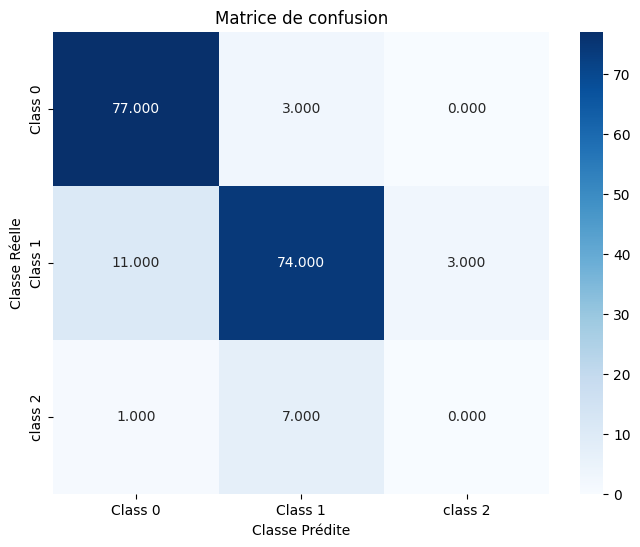

In [70]:
plt =plot_confusion_matrix(conf_mat, classes=['Class 0', 'Class 1','class 2'])

<h1>Les Metrics</h1>

In [71]:
# Accuracy
print("Accuracy:", EXACTITUDE(conf_mat))

# Precision
precision, precision_mean = PRECISION(conf_mat)
print("Precision:", precision_mean)

# Recall
rappel, rappel_mean =RAPPEL(conf_mat)
print("Recall:", rappel_mean)

# F1 score
print("F1 score:", F1_score(conf_mat))

Accuracy: 0.8579545454545454
Precision: 0.5820403067594079
Recall: 0.6011363636363637
F1 score: nan


c:\Users\rachi\Bureau\Master\Tps\Projet_DM\Notebooks\metrics.py:112: RuntimeWarning: invalid value encountered in divide
  f1 = 2 * (prec * rec) / (prec + rec)


<h1>Les Metrics avec sklearn</h1>

In [72]:
#import specific metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, predictions))

# Precision
print("Precision:", precision_score(y_test, predictions, average='macro'))

# Recall
print("Recall:", recall_score(y_test, predictions, average='macro'))

# F1 score
print("F1 score:", f1_score(y_test, predictions, average='macro'))

Accuracy: 0.8579545454545454
Precision: 0.5820403067594079
Recall: 0.6011363636363637
F1 score: 0.5905692399431219


<h1>Execution Time</h1>

In [54]:
print("Knn time :", Knn_time)
print("Decision Tree time :", Decision_Tree_time)
print("Random Forest time :", Random_Forest_time)

Knn time : 11.784752368927002
Decision Tree time : 2.0106945037841797
Random Forest time : 4.914377927780151
